In [1]:
import pandas as pd
import numpy as np

In [2]:
train_txn_sam = pd.read_csv(r"C:\Users\user\ml projects\fraud detection project\fraud detection dataset\train_transaction.csv", nrows=6)
train_id_sam = pd.read_csv(r"C:\Users\user\ml projects\fraud detection project\fraud detection dataset\train_identity.csv", nrows=6)

In [3]:
print('Train transaction sample')
train_txn_sam.head()

Train transaction sample


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_transaction = pd.read_csv(r"C:\Users\user\ml projects\fraud detection project\fraud detection dataset\train_transaction.csv")
train_identity = pd.read_csv(r"C:\Users\user\ml projects\fraud detection project\fraud detection dataset\train_identity.csv")
test_transaction = pd.read_csv(r"C:\Users\user\ml projects\fraud detection project\fraud detection dataset\test_transaction.csv")
test_identity = pd.read_csv(r"C:\Users\user\ml projects\fraud detection project\fraud detection dataset\test_identity.csv")

print('Train transaction shape: ', train_transaction.shape)
print('Train identity shape: ', train_identity.shape)
print('Test transaction shape: ', test_transaction.shape)
print('Test identity shape: ', test_identity.shape)

Train transaction shape:  (590540, 394)
Train identity shape:  (144233, 41)
Test transaction shape:  (506691, 393)
Test identity shape:  (141907, 41)


In [5]:
train_col = set(train_transaction.columns)
test_col = set(test_transaction.columns)

missing_col = train_col - test_col
print(missing_col)

{'isFraud'}


In [6]:
new_column_names = []

for col in test_identity.columns:
    if 'id' in col:
        fixed_name = col.replace('-', '_')
        new_column_names.append(fixed_name)
    else:
        new_column_names.append(col)

test_identity.columns = new_column_names

In [7]:
train_df = train_transaction.merge(train_identity, on='TransactionID', how='left')
print('Merged train data shape: ', train_df.shape)

Merged train data shape:  (590540, 434)


In [8]:
test_df = test_transaction.merge(test_identity, on='TransactionID', how='left')
print('Merged test data shape: ', test_df.shape)

Merged test data shape:  (506691, 433)


In [9]:
print(train_df['isFraud'].value_counts(normalize=True))

isFraud
0    0.96501
1    0.03499
Name: proportion, dtype: float64


In [10]:
train_df.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [11]:
missing_value = train_df.isna().sum()
missing_percent = (missing_value/ len(train_df))* 100
missing_summary = pd.DataFrame({'Missing value': missing_value, 'Missing (%)': missing_percent})
missing_summary = missing_summary[missing_summary['Missing value']>0]
print(missing_summary)
print(missing_summary.shape)

            Missing value  Missing (%)
card2                8933     1.512683
card3                1565     0.265012
card4                1577     0.267044
card5                4259     0.721204
card6                1571     0.266028
...                   ...          ...
id_36              449555    76.126088
id_37              449555    76.126088
id_38              449555    76.126088
DeviceType         449730    76.155722
DeviceInfo         471874    79.905510

[414 rows x 2 columns]
(414, 2)


In [12]:
train_df['DeviceInfo'].value_counts()

DeviceInfo
Windows                  47722
iOS Device               19782
MacOS                    12573
Trident/7.0               7440
rv:11.0                   1901
                         ...  
5044A                        1
VS880                        1
SM-J250M Build/NMF26X        1
SM-N950F Build/R16NW         1
H3321                        1
Name: count, Length: 1786, dtype: int64

In [13]:
is_missing = train_df['DeviceInfo'].isna()

analysis = train_df.groupby(is_missing)['isFraud'].mean() * 100
print(analysis)

DeviceInfo
False    7.253131
True     2.554919
Name: isFraud, dtype: float64


In [14]:
train_df['DeviceInfo'] = train_df['DeviceInfo'].fillna('Unknown device')
test_df['DeviceInfo'] = test_df['DeviceInfo'].fillna('Unkown device')

In [15]:
missing_value = train_df.isna().sum()
missing_percent = (missing_value/ len(train_df))* 100
missing_summary = pd.DataFrame({'Missing value': missing_value, 'Missing (%)': missing_percent})
missing_summary = missing_summary[missing_summary['Missing value']>0]
print(missing_summary)
print(missing_summary.shape)
print(sum(missing_percent))

            Missing value  Missing (%)
card2                8933     1.512683
card3                1565     0.265012
card4                1577     0.267044
card5                4259     0.721204
card6                1571     0.266028
...                   ...          ...
id_35              449555    76.126088
id_36              449555    76.126088
id_37              449555    76.126088
id_38              449555    76.126088
DeviceType         449730    76.155722

[413 rows x 2 columns]
(413, 2)
19482.371896907913


In [16]:
missing_cols = train_df.columns[train_df.isnull().any()]

results = []

for col in missing_cols:
    stats = train_df.groupby(train_df[col].isnull())['isFraud'].mean()
    
    if len(stats) == 2:
        missing_rate = stats[True]
        present_rate = stats[False]
        diff = missing_rate - present_rate
        
        results.append({
            'column': col,
            'fraud_rate_missing': missing_rate,
            'fraud_rate_present': present_rate,
            'absolute_diff': diff
        })

signal_df = pd.DataFrame(results).sort_values(by='absolute_diff', ascending=False)

print(signal_df.head(10))

    column  fraud_rate_missing  fraud_rate_present  absolute_diff
355   V321            0.166667            0.034987       0.131679
354   V320            0.166667            0.034987       0.131679
353   V319            0.166667            0.034987       0.131679
352   V318            0.166667            0.034987       0.131679
350   V316            0.166667            0.034987       0.131679
346   V312            0.166667            0.034987       0.131679
345   V311            0.166667            0.034987       0.131679
351   V317            0.166667            0.034987       0.131679
339   V305            0.166667            0.034987       0.131679
338   V304            0.166667            0.034987       0.131679


In [17]:
to_drop = []
for col in missing_cols:
    missing_pct = train_df[col].isnull().mean()
    sig = signal_df[signal_df['column'] == col]['absolute_diff'].values
    delta = sig[0] if len(sig) > 0 else 0
    
    if missing_pct > 0.90 and abs(delta) < 0.01:
        to_drop.append(col)

train_df.drop(columns=to_drop, inplace=True)
test_df.drop(columns=to_drop, inplace=True)
print(f"Dropped {len(to_drop)} columns with no predictive signal.")

Dropped 0 columns with no predictive signal.


In [18]:
from sklearn.model_selection import train_test_split

x = train_df.drop(columns=['isFraud'])
y = train_df['isFraud']

x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
id_feats = []
M_feats = []
D_feats = []
C_feats =[]
V_feats = []
anchor_feat = []

for col in x_train.columns:
    if col.startswith('id'):
        id_feats.append(col)
    elif col.startswith('M'):
        M_feats.append(col)
    elif col.startswith('D'):
        D_feats.append(col)
    elif col.startswith('C'):
        C_feats.append(col)
    elif col.startswith('V'):
        V_feats.append(col)
    else:
        anchor_feat.append(col)

In [20]:
df_corr = x_train[V_feats].corr().abs()
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
x_train.drop(to_drop, axis=1, inplace=True)
x_eval.drop(to_drop, axis=1, inplace=True)
test_df.drop(to_drop, axis=1, inplace=True)

In [21]:
remaining_missing = x_train.columns[x_train.isnull().any()]

for col in remaining_missing:
    if x_train[col].dtype == 'object':
        x_train[col] = train_df[col].fillna('missing_value')
        x_eval[col] = train_df[col].fillna('missing_value')
        test_df[col] = test_df[col].fillna('missing_value')
    else:
        x_train[f'{col}_is_missing'] = train_df[col].isnull().astype(int)
        x_eval[f'{col}_is_missing'] = train_df[col].isnull().astype(int)
        test_df[f'{col}_is_missing'] = test_df[col].isnull().astype(int)
        
        if col in D_feats:
            x_train[col] = x_train[col].fillna(-999)
            x_eval[col] = x_eval[col].fillna(-999)
            test_df[col] = test_df[col].fillna(-999)
        else:
            median_val = x_train[col].median()
            x_train[col] = x_train[col].fillna(median_val)
            x_eval[col] = x_eval[col].fillna(median_val)
            test_df[col] = test_df[col].fillna(median_val)

C:\Users\user\AppData\Local\Temp\ipykernel_11756\3502975684.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_train[f'{col}_is_missing'] = train_df[col].isnull().astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_11756\3502975684.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_eval[f'{col}_is_missing'] = train_df[col].isnull().astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_11756\3502975684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

In [22]:
def memory_optim(df, name):
    train_memory = df.memory_usage().sum() / 1024**2
    print(f"Memory usage before {name} optimization: {train_memory:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
            else:
                df[col] = df[col].astype(np.float32)
        else:
            df[col] = df[col].astype('category')

    optimized_memory = df.memory_usage().sum() / 1024**2
    print(f"Memory usage after {name} optimization: {optimized_memory:.2f} MB")
    return df

x_train = memory_optim(x_train, 'x_train')
x_eval = memory_optim(x_eval, 'x_eval')
test_df = memory_optim(test_df, 'test_df')

Memory usage before x_train optimization: 2688.86 MB
Memory usage after x_train optimization: 834.51 MB
Memory usage before x_eval optimization: 672.22 MB
Memory usage after x_eval optimization: 208.55 MB
Memory usage before test_df optimization: 2879.98 MB
Memory usage after test_df optimization: 891.16 MB


In [23]:
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)
x_train.head(6)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V98,V99,V100,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V165,V166,V168,V169,V170,V171,V172,V173,V174,V175,V176,V178,V180,V181,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V203,V204,V205,V206,V207,V208,V209,V210,...,V78_is_missing,V79_is_missing,V80_is_missing,V81_is_missing,V82_is_missing,V83_is_missing,V84_is_missing,V85_is_missing,V86_is_missing,V87_is_missing,V88_is_missing,V89_is_missing,V90_is_missing,V91_is_missing,V92_is_missing,V93_is_missing,V94_is_missing,V95_is_missing,V96_is_missing,V98_is_missing,V99_is_missing,V100_is_missing,V104_is_missing,V105_is_missing,V106_is_missing,V107_is_missing,V108_is_missing,V109_is_missing,V110_is_missing,V111_is_missing,V112_is_missing,V113_is_missing,V114_is_missing,V115_is_missing,V116_is_missing,V117_is_missing,V118_is_missing,V119_is_missing,V120_is_missing,V121_is_missing,V122_is_missing,V123_is_missing,V124_is_missing,V125_is_missing,V126_is_missing,V127_is_missing,V128_is_missing,V129_is_missing,V130_is_missing,V131_is_missing,V135_is_missing,V136_is_missing,V137_is_missing,V138_is_missing,V139_is_missing,V140_is_missing,V141_is_missing,V142_is_missing,V143_is_missing,V144_is_missing,V145_is_missing,V146_is_missing,V147_is_missing,V148_is_missing,V149_is_missing,V150_is_missing,V151_is_missing,V152_is_missing,V153_is_missing,V154_is_missing,V155_is_missing,V156_is_missing,V157_is_missing,V158_is_missing,V159_is_missing,V160_is_missing,V161_is_missing,V162_is_missing,V163_is_missing,V165_is_missing,V166_is_missing,V168_is_missing,V169_is_missing,V170_is_missing,V171_is_missing,V172_is_missing,V173_is_missing,V174_is_missing,V175_is_missing,V176_is_missing,V178_is_missing,V180_is_missing,V181_is_missing,V183_is_missing,V184_is_missing,V185_is_missing,V186_is_missing,V187_is_missing,V188_is_missing,V189_is_missing,V190_is_missing,V191_is_missing,V192_is_missing,V193_is_missing,V194_is_missing,V195_is_missing,V196_is_missing,V197_is_missing,V198_is_missing,V199_is_missing,V200_is_missing,V201_is_missing,V203_is_missing,V204_is_missing,V205_is_missing,V206_is_missing,V207_is_missing,V208_is_missing,V209_is_missing,V210_is_missing,V212_is_missing,V214_is_missing,V215_is_missing,V216_is_missing,V217_is_missing,V218_is_missing,V219_is_missing,V220_is_missing,V221_is_missing,V222_is_missing,V223_is_missing,V224_is_missing,V225_is_missing,V226_is_missing,V227_is_missing,V228_is_missing,V229_is_missing,V230_is_missing,V234_is_missing,V235_is_missing,V236_is_missing,V237_is_missing,V238_is_missing,V239_is_missing,V240_is_missing,V241_is_missing,V242_is_missing,V243_is_missing,V244_is_missing,V245_is_missing,V246_is_missing,V247_is_missing,V248_is_missing,V249_is_missing,V250_is_missing,V251_is_missing,V252_is_missing,V253_is_missing,V254_is_missing,V255_is_missing,V256_is_missing,V257_is_missing,V258_is_missing,V259_is_missing,V260_is_missing,V261_is_missing,V262_is_missing,V263_is_missing,V264_is_missing,V265_is_missing,V266_is_missing,V267_is_missing,V268_is_missing,V270_is_missing,V271_is_missing,V272_is_missing,V273_is_missing,V274_is_missing,V275_is_missing,V276_is_miss

In [24]:
uid_cols = ['card1', 'addr1']
for d_col in ['D1', 'D15']:
    temp_d = x_train.groupby(uid_cols)[d_col].mean().reset_index().rename(columns={d_col: f'uid_{d_col}_mean'})
    x_train = x_train.merge(temp_d, on=uid_cols, how='left')
    x_eval = x_eval.merge(temp_d, on=uid_cols, how='left')
    test_df = test_df.merge(temp_d, on=uid_cols, how='left')


card1_addr_map = x_train.groupby('card1')['addr1'].nunique().to_dict()
x_train['card1_addr1_count'] = x_train['card1'].map(card1_addr_map)
x_eval['card1_addr1_count'] = x_eval['card1'].map(card1_addr_map)
test_df['card1_addr1_count'] = test_df['card1'].map(card1_addr_map)


for col in ['card1', 'card1_addr1']:
    group_cols = col.split('_')
    
    if len(group_cols) == 1:
        mean_map = x_train.groupby(group_cols[0])['TransactionAmt'].mean().to_dict()
        x_train[f'{col}_amt_mean'] = x_train[group_cols[0]].map(mean_map)
        x_eval[f'{col}_amt_mean'] = x_eval[group_cols[0]].map(mean_map)
        test_df[f'{col}_amt_mean'] = test_df[group_cols[0]].map(mean_map)
    else:
        temp_means = x_train.groupby(group_cols)['TransactionAmt'].mean().reset_index().rename(columns={'TransactionAmt': f'{col}_amt_mean'})
        x_train = x_train.merge(temp_means, on=group_cols, how='left')
        x_eval = x_eval.merge(temp_means, on=group_cols, how='left')
        test_df = test_df.merge(temp_means, on=group_cols, how='left')

    x_train[f'{col}_amt_ratio'] = x_train['TransactionAmt'] / (x_train[f'{col}_amt_mean'] + 0.01)
    x_eval[f'{col}_amt_ratio'] = x_eval['TransactionAmt'] / (x_eval[f'{col}_amt_mean'] + 0.01)
    test_df[f'{col}_amt_ratio'] = test_df['TransactionAmt'] / (test_df[f'{col}_amt_mean'] + 0.01)


for col in C_feats:
    c_means = x_train.groupby('card1')[col].mean().to_dict()
    
    x_train[f'{col}_card1_mean'] = x_train['card1'].map(c_means)
    x_eval[f'{col}_card1_mean'] = x_eval['card1'].map(c_means)
    test_df[f'{col}_card1_mean'] = test_df['card1'].map(c_means)
    
    x_train[f'{col}_ratio'] = x_train[col] / (x_train[f'{col}_card1_mean'] + 0.01)
    x_eval[f'{col}_ratio'] = x_eval[col] / (x_eval[f'{col}_card1_mean'] + 0.01)
    test_df[f'{col}_ratio'] = test_df[col] / (test_df[f'{col}_card1_mean'] + 0.01)

    x_train.drop(f'{col}_card1_mean', axis=1, inplace=True)
    x_eval.drop(f'{col}_card1_mean', axis=1, inplace=True)
    test_df.drop(f'{col}_card1_mean', axis=1, inplace=True)


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.impute import SimpleImputer
import gc

del train_df, train_transaction, test_transaction, train_identity, test_identity
gc.collect() 

cat_features = [c for c in x_train.columns if x_train[c].dtype == 'object' or str(x_train[c].dtype) == 'category']
num_features = [c for c in x_train.columns if c not in cat_features]

x_train[num_features] = x_eval[num_features].astype('float32')
x_eval[num_features] = x_eval[num_features].astype('float32')

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
    
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga', random_state=42))
])

pipe.fit(x_train, y_train)

eval_probs = pipe.predict_proba(x_eval)[:, 1]
auc_score = roc_auc_score(y_eval, eval_probs)
y_pred = pipe.predict(x_eval)

print(f"--- Baseline Results ---")
print(f"ROC-AUC Score: {auc_score:.4f}")
print("\nClassification Report:")
print(classification_report(y_eval, y_pred))

C:\Users\user\ml_env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


--- Baseline Results ---
ROC-AUC Score: 0.7303

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86    113866
           1       0.08      0.59      0.15      4242

    accuracy                           0.76    118108
   macro avg       0.53      0.67      0.50    118108
weighted avg       0.95      0.76      0.83    118108



In [26]:
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()
coeffs = pipe.named_steps['model'].coef_[0]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coeffs,
    'Abs_Coefficient': np.abs(coeffs)
}).sort_values(by='Abs_Coefficient', ascending=False)

black_box_rank = importance_df[importance_df['Feature'].str.contains('ratio|mean|count|is_missing')]

print("--- Top 20 Most Influential Features ---")
print(importance_df.head(20))

print("\n--- Performance of Your Engineered Features ---")
print(black_box_rank.head(10))

--- Top 20 Most Influential Features ---
             Feature  Coefficient  Abs_Coefficient
737       cat__card6    -0.671571         0.671571
764  cat__DeviceType     0.493111         0.493111
743          cat__M4    -0.422274         0.422274
740          cat__M1     0.355859         0.355859
759       cat__id_34     0.339382         0.339382
755       cat__id_29    -0.330634         0.330634
754       cat__id_28    -0.290606         0.290606
735   cat__ProductCD    -0.206770         0.206770
742          cat__M3    -0.199116         0.199116
746          cat__M7     0.147053         0.147053
751       cat__id_16    -0.142793         0.142793
745          cat__M6    -0.133791         0.133791
752       cat__id_23     0.124923         0.124923
748          cat__M9    -0.108059         0.108059
750       cat__id_15    -0.104600         0.104600
761       cat__id_36    -0.104161         0.104161
736       cat__card4     0.092368         0.092368
749       cat__id_12    -0.082348        

In [27]:
low_importance_cols = importance_df[importance_df['Abs_Coefficient'] < 0.005]['Feature'].tolist()

cols_to_drop = []
for col in low_importance_cols:
    clean_name = col.replace('num__', '').replace('cat__', '')
    if clean_name in x_train.columns:
        cols_to_drop.append(clean_name)

print(f"Pruning {len(set(cols_to_drop))} low-impact features...")

x_train = x_train.drop(columns=list(set(cols_to_drop)))
x_eval = x_eval.drop(columns=list(set(cols_to_drop)))
test_df = test_df.drop(columns=list(set(cols_to_drop)))

print(f"New Feature Count: {x_train.shape[1]}")

Pruning 406 low-impact features...
New Feature Count: 360


In [28]:
import sys
!{sys.executable} -m pip install lightgbm

In [29]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

for col in x_train.select_dtypes(include=['object']).columns:
    x_train[col] = x_train[col].astype('category')
    x_eval[col] = x_eval[col].astype('category')

lgb_model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    is_unbalance=True,
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(
    x_train, 
    y_train,
    eval_set=[(x_eval, y_eval)],
    eval_metric='auc',
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

lgb_probs = lgb_model.predict_proba(x_eval)[:, 1]
print(f"LightGBM ROC-AUC: {roc_auc_score(y_eval, lgb_probs):.4f}")

[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.530561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21996
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 360
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034758 -> initscore=-3.323956
[LightGBM] [Info] Start training from score -3.323956
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.792962	valid_0's binary_logloss: 0.149447
LightGBM ROC-AUC: 0.7930


In [30]:
lgb_auc_score = roc_auc_score(y_eval, lgb_probs)
results = {
    'Model': ['Logistic Regression', 'LightGBM'],
    'ROC-AUC Score': [auc_score, lgb_auc_score],
    'Training Time': ['~30 mins', '< 3 mins']
}
comparison_df = pd.DataFrame(results)
print(comparison_df)

                 Model  ROC-AUC Score Training Time
0  Logistic Regression       0.730286      ~30 mins
1             LightGBM       0.792962      < 3 mins


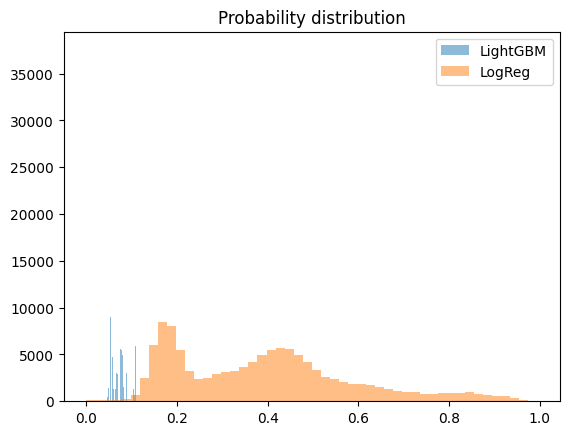

In [32]:
import matplotlib.pyplot as plt

plt.hist(lgb_probs, bins=50, alpha=0.5, label='LightGBM')
plt.hist(eval_probs, bins=50, alpha=0.5, label='LogReg')
plt.legend()
plt.title('Probability distribution')
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix

def evaluate_at_percentile(probs, y_true, pct=98):
    threshold = np.percentile(probs, pct)
    preds = (probs >= threshold).astype(int)
    return confusion_matrix(y_true, preds), classification_report(y_true, preds)

cm_lgb, report_lgb = evaluate_at_percentile(lgb_probs, y_eval)
cm_log, report_log = evaluate_at_percentile(eval_probs, y_eval)

print("LightGBM\n", cm_lgb, report_lgb)
print("Logistic Regresion \n", cm_log, report_log)

LightGBM
 [[109026   4840]
 [  3126   1116]]               precision    recall  f1-score   support

           0       0.97      0.96      0.96    113866
           1       0.19      0.26      0.22      4242

    accuracy                           0.93    118108
   macro avg       0.58      0.61      0.59    118108
weighted avg       0.94      0.93      0.94    118108

Logistic Regresion 
 [[111904   1962]
 [  3841    401]]               precision    recall  f1-score   support

           0       0.97      0.98      0.97    113866
           1       0.17      0.09      0.12      4242

    accuracy                           0.95    118108
   macro avg       0.57      0.54      0.55    118108
weighted avg       0.94      0.95      0.94    118108



In [38]:
import joblib

artifact = {
    'model' : lgb_model,
    'feature_names' : x_train.columns.tolist(),
    'metric': roc_auc_score,
    'roc_auc': lgb_auc_score
}

joblib.dump(artifact, r"C:\Users\user\ml projects\fraud detection project\models\lightgbm_fraud_model.pkl", compress=3)

['C:\\Users\\user\\ml projects\\fraud detection project\\models\\lightgbm_fraud_model.pkl']